In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.feature_selection import VarianceThreshold
pd.options.display.max_columns = None
from hyperopt import space_eval
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,roc_auc_score,precision_score,recall_score,confusion_matrix,make_scorer,silhouette_score,plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from scikitplot.helpers import binary_ks_curve
from matplotlib import pyplot
from sklearn.model_selection import validation_curve
from category_encoders import OneHotEncoder,TargetEncoder
from yellowbrick.model_selection import RFECV
import shap
import pandas as pd
import numpy as np
import warnings
from sklearn.feature_selection import VarianceThreshold
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,7)
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from scikitplot.helpers import binary_ks_curve
from matplotlib import pyplot
from sklearn.model_selection import validation_curve
from category_encoders import OneHotEncoder,TargetEncoder
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import shap
from hyperopt import fmin, tpe, hp,Trials

### Análise exploratória

In [2]:
df_train = pd.read_csv("../input/santander-customer-satisfaction/train.csv")
df_validation = pd.read_csv("../input/santander-customer-satisfaction/test.csv")
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [3]:
df_validation.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [6]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [7]:
df_validation.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

## Definindo features

Aqui estamos dividindo o dataframe em 3 grupos:

#### 1 - Colunas de identificação

- Colunas que representam chaves ID 

#### 2 Target

- Coluna que identifica a target do problema

#### 3 Variáveis dependentes/explicativas

- Aqui são todas as features disponiveis, esse grupo foi dividido em 2 subgrupos que são variaveis categoricas e variaveis continuas

In [8]:
id_columns = ['ID']
target_column = ['TARGET']

num_vars = df_train.select_dtypes(include=['float64','int64'])
cat_vars = df_train.select_dtypes(include=['object'])

print('initial numerical vars =',len(num_vars.columns))
print('initial categorical vars =',len(cat_vars.columns))

y = df_train[target_column]
x = df_train.drop(columns=id_columns + target_column).fillna(0)

initial numerical vars = 371
initial categorical vars = 0


### Qual o percentual de target do nosso problema?

Ao olharmos a distribuição de target da nossa base toda temos um problema que concentra apenas 3,95% de clientes com target positiva

In [9]:
pct = pd.DataFrame(y.value_counts())
pct['percentual'] = 100*pct[0]/len(y)
pct.columns = ['target','percentual']
pct

,target,percentual
TARGET,,
0,73012,96.043147
1,3008,3.956853


### Separação em treino e teste 

- Foram usados 25% dos dados para teste e 75% para treino
- O split foi feito de forma estratificada para preservarmos a distribuição da target em treino e teste

In [10]:
seed = 18051996

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=seed,stratify=y)

print("Número de linhas no treino= ",len(x_train))
print('---------------------------')
print('Verificando distribuição da target no treino')
print(y_train.value_counts()/len(y_train)*100)
print('---------------------------')
print('Verificando distribuição da target no teste')
print("Número de linhas no teste = ",len(x_test))
print('---------------------------')
print(y_test.value_counts()/len(y_test)*100)

Número de linhas no treino=  57015
---------------------------
Verificando distribuição da target no treino
TARGET
0         96.043147
1          3.956853
dtype: float64
---------------------------
Verificando distribuição da target no teste
Número de linhas no teste =  19005
---------------------------
TARGET
0         96.043147
1          3.956853
dtype: float64


## **Case A**
Um falso positivo ocorre quando classificamos um cliente como insatisfeito, mas ela não se comporta como tal. Neste caso, o custo de preparar e executar uma ação de retenção é um valor fixo de 10 reais por cliente. Nada é ganho pois a ação de retenção não é capaz de mudar o comportamento do cliente. Um falso negativo ocorre quando um cliente é previsto como satisfeito, mas na verdade ele estava insatisfeito. Neste caso, nenhum dinheiro foi gasto e nada foi ganho. Um verdadeiro positivo é um cliente que estava insatisfeito e foi alvo de uma ação de retenção. O benefício neste caso é o lucro da ação (RS 100) menos os custos relacionados à ação de retenção (RS 10). Por fim, um verdadeiro negativo é um cliente insatisfeito e que não é alvo de nenhuma ação. O benefício neste caso é zero, isto é, nenhum custo, mas nenhum lucro. A primeira tarefa deste case é maximizar o lucro esperado por cliente considerando o contexto descrito no parágrafo acima.

### Definição da função que devemos otimizar

- Aqui por mais que estamos trabalhando com um problema de classificação, devemos ter o cuidado pois o problema possui uma série de condições que devemos tomar cuidado na modelagem que são:

- **Beneficio do verdadeiro positivo (cliente que estava insatisfeito e foi alvo de ação) = 100RS - 10RS --> 90R$**

In [11]:
def lucro(modelo, x, y_true,matriz = False):
    
    if modelo == "aleatorio_zero":
        x['y_pred'] = 0
        y_pred = x['y_pred']
        x.drop(columns='y_pred',inplace=True)
        
    elif modelo == "aleatorio_um":
        x['y_pred'] = 1
        y_pred = x['y_pred']
        x.drop(columns='y_pred',inplace=True)
        
    else:
        y_pred = modelo.predict(x)
    
    #Cria matriz de confusao para nos ajudar capturar os TP e FP
    matriz_confusao = confusion_matrix(y_true, y_pred)
      
    #capturando dados de verdadeiro positivo e falso positivo na matriz de confusao
    verdadeiro_positivo = matriz_confusao[1][1]
    falso_positivo = matriz_confusao[0][1]

    #Calcula o lucro com base na formula do problema
    lucro_total = 90*verdadeiro_positivo - 10*falso_positivo 

    if matriz == True:
        print('Matriz de confusão:')
        print(matriz_confusao)      
        print('\nLucro obtido com a ação: R$ ' + str(lucro_total))

    
    return lucro_total

### Modelo baseline

1) Temos um modelo totalmente desbalanceado 3,95% de target se chutarmos todo mundo como target 1 ou como 0, Qual o **lucro esperado de uma previsao totalmente aleatoria** como essa? **Será que teremos lucro?**

2) E se treinarmos uma **decision tree sem restrições** e sem tratamento na base de treino qual o lucro esperado para essa previsão?

#### Chutando todo mundo como 0, obvio teremos **lucro igual 0 R$** (nenhum cliente atingido pela campanha)

In [12]:
lucro("aleatorio_zero", x_test, y_test,True)

Matriz de confusão:
[[18253     0]
 [  752     0]]

Lucro obtido com a ação: R$ 0


0

#### Chutando todo mundo como 1, teremos **lucro igual -114850 R$** (Grande prejuizo, pois teremos um grande número de falso positivo)

In [13]:
lucro("aleatorio_um", x_test, y_test,True)

Matriz de confusão:
[[    0 18253]
 [    0   752]]

Lucro obtido com a ação: R$ -114850


-114850

#### Fazendo um árvore de decisão sem restricoes e sem preparamento da base, **teremos um lucro igual a 1090 RS**

In [15]:
baseline = DecisionTreeClassifier(random_state=seed).fit(x_train,y_train)
lucro(baseline, x_test, y_test,True)

Matriz de confusão:
[[17561   692]
 [  663    89]]

Lucro obtido com a ação: R$ 1090


1090

### A partir daqui já temos um baseline a ser batido, estamos lucrando 1090R$ com uma **arvore de decisao sem restrições**. E se ao inves de treinarmos um decision tree, treinarmos uma **random forest e tunarmos seus hiperparametros?** será que iremos lucrar mais?

### Modelo otimizado (Random forest com tuning)

Aqui vamos tentar tunar **4 hiperparametros**:

- **n_estimators** (número de arvores na random forest)
- **max_depth** (profundidade maxima de cada arvores, para nao termos nenhum problema de overfitting/variancia alta)
- **max_features** (numero maximo de features em cada arvore)
- **min_samples_split** (numero minimo de amostras apra fazermos split)

Iremos utilizar o hyperopt para efeituar essa busca,em prol de **maximizar o lucro esperado total**, como estamos em uma versao inicial iremos fazer apenas **5 rodadas de buscas.**


In [34]:
#Definição da função de busca
max_profit_scorer = make_scorer(lucro, greater_is_better=True)

# Função de treinamento e avaliação
def train_model(x_train,y_train,x_test,y_test, objetivo):

    def objective(params):
        
        #hiperparametros a serem tunados
        params = {'n_estimators': int(params['n_estimators'])
              ,'max_depth': int(params['max_depth'])
              ,'max_features': params['max_features']
              ,'min_samples_split': int(params['min_samples_split'])}
        
        #modelo
        clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', **params,random_state=seed)
        
        #funcao obejtivo a ser passada no cross validation
        score = cross_val_score(clf, x_train, y_train, scoring=objetivo, cv=StratifiedKFold()).mean()
        
        #print do lucro a cada iteracao
        print("Lucro {:.3f} params {}".format(score, params))
        
        #Como nosso otimizador precisa minimizar uma metrica multiplicamos nossa funcao por -1*
        score = -1*(score)
        
        return score

    #Definicção do espaco de busca
    space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 50),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'max_features': hp.choice('max_features', ['auto', 'sqrt','log2']),
    "min_samples_split" : hp.quniform('min_samples_split',50,200,10)
    }

    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=5)
               
    # Print best parameters
    best_params = space_eval(space, best)

    print("Start training the best model")

    model = RandomForestClassifier(n_jobs=-1,random_state=seed
                                          , class_weight='balanced'
                                          , max_features=best_params['max_features']
                                          , max_depth = int(best_params['max_depth'])
                                          , min_samples_split = int(best_params['min_samples_split'])
                                          , n_estimators = int(best_params['n_estimators'])).fit(x_train,y_train)
    #Scoring the best model in train dataset
    lucro(model, x_test, y_test)
    print("Scoring the train data")
    #Scoring the best model in train dataset
    predict_train_entire = model.predict(x_train)
    proba_train_entire = model.predict_proba(x_train)[:,1]

    print("Scoring the test data")
    #Scoring the best model in test dataset
    predict_test_entire = model.predict(x_test)
    proba_test_entire = model.predict_proba(x_test)[:,1]

    print("Getting metrics")
    # calculate scores
    auc_train = roc_auc_score(y_train, proba_train_entire)
    auc_test = roc_auc_score(y_test, proba_test_entire )

    print('AUC_TRAIN', auc_train)
    print('AUC_Test', auc_test)
    
    #Calculate f1 score
    f1_train = f1_score(y_train, predict_train_entire)
    f1_test = f1_score(y_test, predict_test_entire)
    print('F1_TRAIN', f1_train)
    print('F1_Test', f1_test)
    
    # calculate roc curves
    fpr_train, tpr_train, _ = roc_curve(y_train, proba_train_entire)
    fpr_test, tpr_test, _ = roc_curve(y_test, proba_test_entire)

    # plot the roc curve for the model
    pyplot.plot(fpr_train, tpr_train, linestyle='--', label='Train')
    pyplot.plot(fpr_test, tpr_test, linestyle='--', label='Test')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    return pyplot.show(),plot_precision_recall_curve(model, x_test, y_test)

### Treinando um modelo de Random forest

Aqui já obtemos um resultado melhor do que simplemente chutarmos aleatoriamente um valor para nossa target ou se treinarmos uma arvore de decisao sem restrições

Obtivemos um de **LUCRO 6036R$** que foi melhor que o nosso **baseline**, porem ainda temos espaço para melhorar

Lucro -1274.000 params {'n_estimators': 200, 'max_depth': 11, 'max_features': 'log2', 'min_samples_split': 110}
Lucro -1530.000 params {'n_estimators': 450, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 180}
Lucro -1474.000 params {'n_estimators': 350, 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 130}
Lucro 3988.000 params {'n_estimators': 150, 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 120}
Lucro 6036.000 params {'n_estimators': 150, 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 130}
100%|██████████| 5/5 [02:21<00:00, 28.36s/trial, best loss: -6036.0]
Start training the best model
Scoring the train data
Scoring the test data
Getting metrics
AUC_TRAIN 0.8768574458889429
AUC_Test 0.8135220194057287
F1_TRAIN 0.2525676262114856
F1_Test 0.21251372118551046


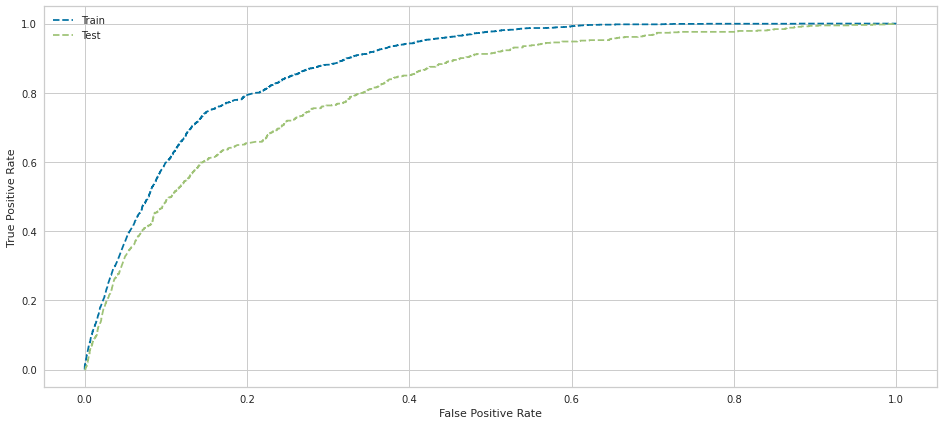

(None,
 <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x7fc8f1fbd8d0>)

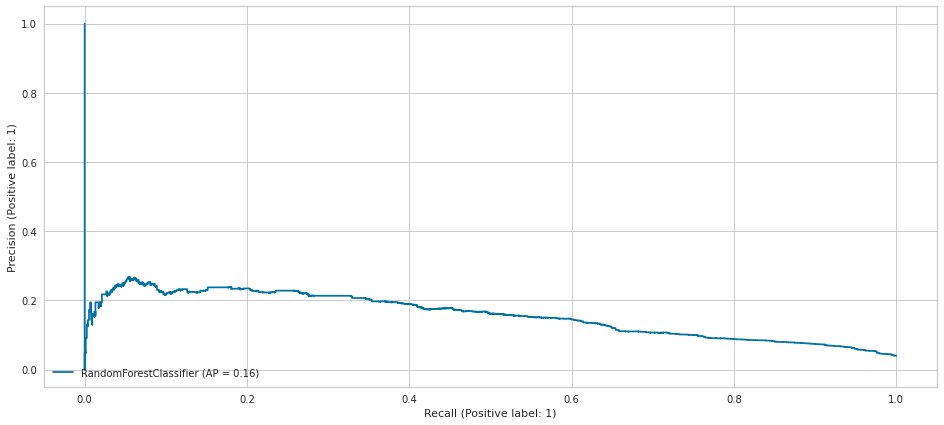

In [35]:
train_model(x_train,y_train,x_test,y_test, objetivo = lucro)

### Como podemos melhorar os resultados até agora?

- Redução do número de features
- melhor exploracao dos hiperparametros dos modelos
- testar novas abordagens

### Redução do número de features

Com intuito de minimizar o custo de altas dimensões, ajudando a diminuir a complexidade computacional de todos algoritmos que serão criados e diminuir a chance de problemas de sobreajuste devido ao alto numero de dimensoes iremos fazer uma análise para diminuir o espaco de possibilidades. Todo processo foi divididos nessas etapas:

- Eliminação de variaveis constantes ou que possuam pouca variação (variance threshould)
- Eliminação de multicolinearidade em variaveis continuas

In [36]:
def variance_threshold(df,threshold):
    vt = VarianceThreshold(threshold=threshold)

    vt.fit(df)

    mask = vt.get_support()

    num_vars_reduced = df.iloc[:, mask]
    return num_vars_reduced

def correlation(df, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset

    return df

#Aplicando variance e correlação
num_vars_vt = variance_threshold(x_train.filter(num_vars),threshold = 0.01)
num_vars_vt_corr = correlation(x_train.filter(num_vars_vt), threshold = 0.8)
           
#Select important features
x_train = x_train.filter(list(num_vars_vt_corr.columns)+list(cat_vars)+list(id_columns)).fillna(0)
x_test  =  x_test.filter(list(num_vars_vt_corr.columns)+list(cat_vars)+list(id_columns)).fillna(0)

print('Número total de features =', len(x_train.columns))

Número total de features = 126


### Recursive Feature elimination (Feature selection)

Com intuito de selecionar as variaveis que melhor irão nos ajudar a discriminar nosso problema iremos utilizar um método chamado recursive feature elimination. esse método funciona da seguinte forma:

- 1) Treina um modelo com todas as features
- 2) Elimina as features com feature_importances_ menores
- 3) Retreina um novo modelo com as features restantes
- 4) Repete passo 2 e 3
- 5) Avalia o número de features selecionadas versus a métrica de sucesso do seu modelo

Aqui escolhemos o algoritmo de Random forest e a métrica de avaliação é o nosso lucro máximo

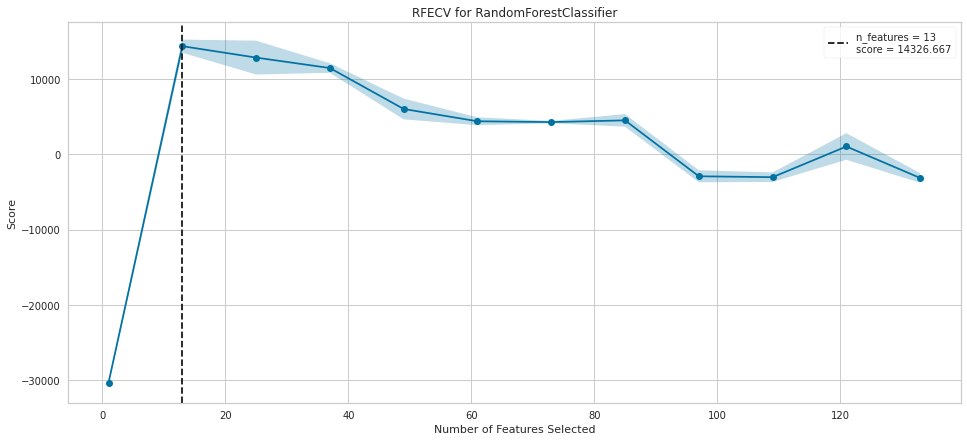

Optimal number of features : 13
features selecionadas:  ['var15', 'imp_op_var41_efect_ult1', 'num_var4', 'num_var30_0', 'num_var30', 'saldo_var5', 'saldo_var30', 'var36', 'num_var22_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3', 'var38']


In [37]:
from yellowbrick.model_selection import RFECV
fs_model = RandomForestClassifier(max_depth=5
                                  ,random_state=seed
                                  ,n_jobs=-1
                                  ,n_estimators=50
                                  ,class_weight='balanced')

# Instantiate RFECV visualizer with a linear Random forest classifier
visualizer = RFECV(fs_model,scoring=lucro,cv=3,step=0.1)

# Fit the data to the visualizer
visualizer.fit(x_train, y_train)

# Finalize and render the figure
visualizer.show()

print('Optimal number of features :', visualizer.n_features_)
best_features = list(x_train.columns[visualizer.support_])
print('features selecionadas: ', best_features)

x_train = x_train[best_features]
x_test = x_test[best_features]
df_validation = df_validation[best_features]

### Exploração da busca dos hiperparametros por Validation curve 

Dado que aplicamos o feature selection e outras técnicas para reduzirmos o número de features, iremos novamente treinar um novo modelo random forest passando por toda etapa de tuning de hiperparametros. 
Para termos um **melhor direcionamento** na etapa de tuning e termos um bom balanco entre **Viés e variancia** iremos utilizar o validation curve para testarmos como nossa métrica de performance se comporta dado um intervalo de busca dos parâmetros que serão tunados na random forest.

Aqui vamos olhar 2 hiperparametros:

- Profudidade maxima e numero de estimadores

In [45]:
def plot_validation_curve(x,y,modelo,parametro,param_range,metrica):

    # Calculate accuracy on training and test set using range of parameter values
    train_scores, test_scores = validation_curve(modelo, 
                                                 x, 
                                                 y, 
                                                 param_name=parametro, 
                                                 param_range=param_range,
                                                 cv=3, 
                                                 scoring=metrica, 
                                                 n_jobs=-1)


    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot mean accuracy scores for training and test sets
    plt.plot(param_range, train_mean, label="Training score", color="red")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

    # Plot accurancy bands for training and test sets
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gray")

    # Create plot
    plt.title("Validation Curve With Random Forest")
    plt.xlabel("Parameter")
    plt.ylabel("retorno")
    plt.tight_layout()
    plt.ylim(ymin=0)
    plt.legend(loc="best")
    plt.show()

### Max depth

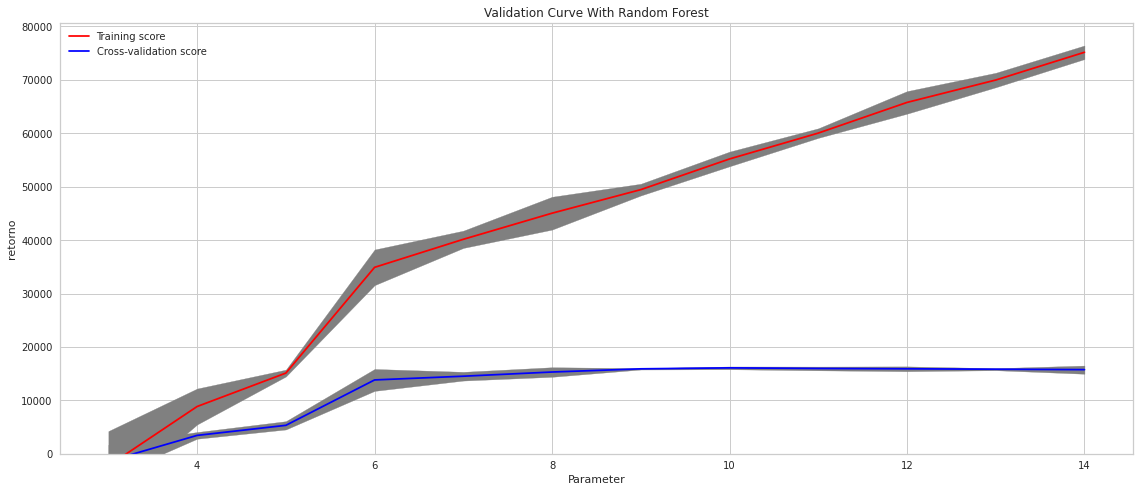

In [46]:
plot_validation_curve(x = x_train,
                      y = y_train.values.reshape(-1,),
                      modelo = RandomForestClassifier(class_weight= 'balanced'),
                      parametro = "max_depth",
                      param_range = np.arange(3, 15, 1),
                      metrica = lucro)

### N estimators

Iremos iterar no número máximo de árvores que nossa random forest pode receber

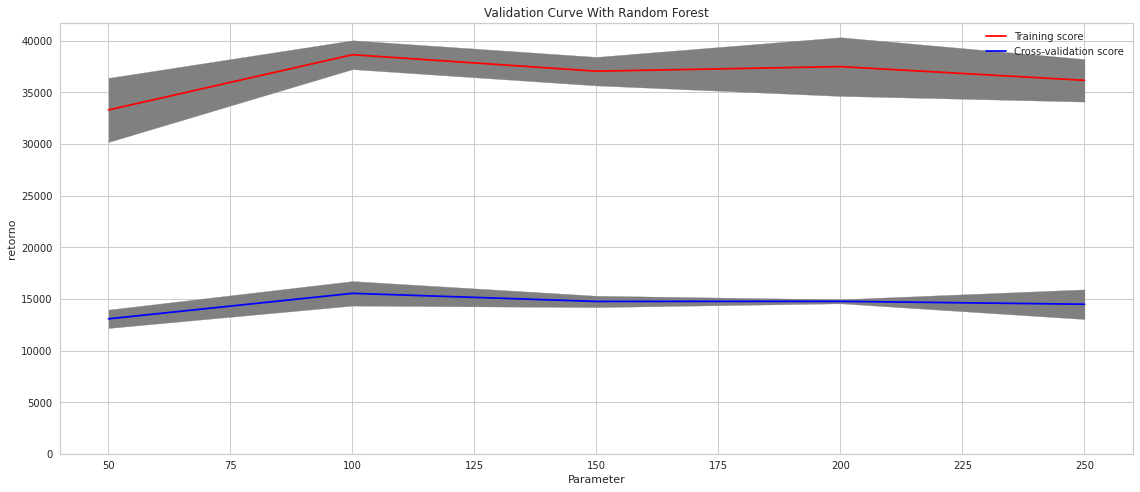

In [47]:
plot_validation_curve(x = x_train,
                      y = y_train.values.reshape(-1,),
                      modelo = RandomForestClassifier(class_weight= 'balanced' ,max_depth=6),
                      parametro = "n_estimators",
                      param_range = np.arange(50, 300, 50),
                      metrica = lucro)

### Tuning de hiperparametros dado o validation curve

Lucro 8706.000 params {'n_estimators': 200, 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 190}
Lucro 9102.000 params {'n_estimators': 150, 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 150}
Lucro 8760.000 params {'n_estimators': 200, 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 140}
Lucro 2534.000 params {'n_estimators': 300, 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 100}
Lucro 9092.000 params {'n_estimators': 150, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 130}
Lucro 8560.000 params {'n_estimators': 250, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 140}
Lucro 8542.000 params {'n_estimators': 300, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 130}
Lucro 8116.000 params {'n_estimators': 300, 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 200}
Lucro 6398.000 params {'n_estimators': 150, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 130}
Lucro 7642

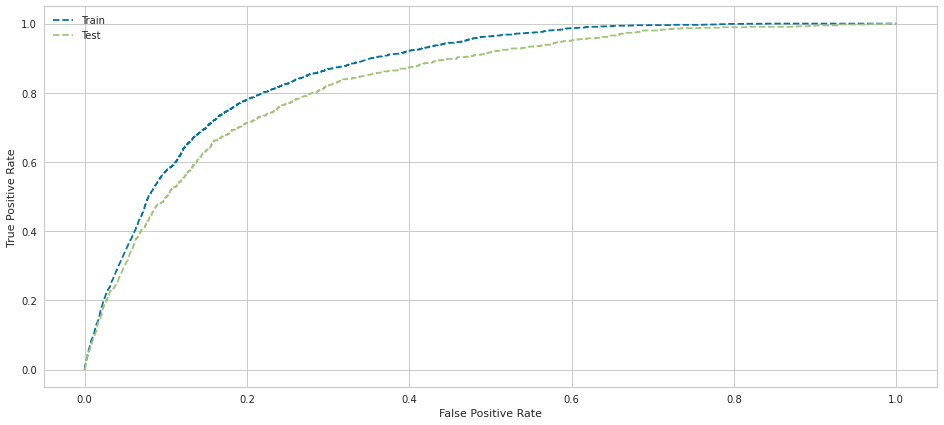

ROC AUC Train =0.865
ROC AUC Test =0.830
-----------------------------------------------------
f1 train = 0.2502049027643245
f1 test = 0.23045639403524626
-----------------------------------------------------
------------------------
Calculate decil in train
------------------------
     Qtd  Sum_Target  Per_Target  Per_Acum_Target  Max_proba  Min_proba   Lift
0  11403        1692      75.000           75.000      0.868      0.494  3.750
1  11403         365      16.179           91.179      0.494      0.368  2.279
2  11403         159       7.048           98.227      0.368      0.214  1.637
3  11403          37       1.640           99.867      0.214      0.102  1.248
4  11403           3       0.133          100.000      0.102      0.017  1.000
------------------------
Calculate decil in test
------------------------
    Qtd  Sum_Target  Per_Target  Per_Acum_Target  Max_proba  Min_proba   Lift
0  3801         516      68.617           68.617      0.856      0.492  3.431
1  3801     

In [99]:
def objective(params):
    
    params = {'n_estimators': int(params['n_estimators'])
              ,'max_depth': int(params['max_depth'])
              ,'max_features': params['max_features']
              ,'min_samples_split': int(params['min_samples_split'])}
    
    clf = RandomForestClassifier(n_jobs=-1
                                 , class_weight='balanced'
                                 , **params
                                 ,random_state=seed)
    
    score = cross_val_score(clf, x_train, y_train, scoring=lucro, cv=StratifiedKFold()).mean()
    
    print("Lucro {:.3f} params {}".format(score, params))
    score = -1*(score)
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 300, 50),
    'max_depth': hp.quniform('max_depth', 3, 8, 1),
    'max_features': hp.choice('max_features', ['auto', 'sqrt','log2']),
    "min_samples_split" : hp.quniform('min_samples_split',20,200,10)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

# Print best parameters
best_params = space_eval(space, best)
print("top hiperparameters:",best_params)

print("Start training the best model")

model = RandomForestClassifier(n_jobs=-1,random_state=seed
                                      , class_weight='balanced'
                                      , max_features=best_params['max_features']
                                      , max_depth = int(best_params['max_depth'])
                                      , min_samples_split = int(best_params['min_samples_split'])
                                      , n_estimators = int(best_params['n_estimators'])).fit(x_train,y_train)
print("Scoring the train data")
#Scoring the best model in train dataset
lucro(model, x_test, y_test)
print("Scoring the train data")
#Scoring the best model in train dataset
predict_train_entire = model.predict(x_train)
proba_train_entire = model.predict_proba(x_train)[:,1]

print("Scoring the test data")
#Scoring the best model in test dataset
predict_test_entire = model.predict(x_test)
proba_test_entire = model.predict_proba(x_test)[:,1]

print("Getting metrics")
# calculate scores
auc_train = roc_auc_score(y_train, proba_train_entire)
auc_test = roc_auc_score(y_test, proba_test_entire )

# calculate roc curves
fpr_train, tpr_train, _ = roc_curve(y_train, proba_train_entire)
fpr_test, tpr_test, _ = roc_curve(y_test, proba_test_entire)

# plot the roc curve for the model
pyplot.plot(fpr_train, tpr_train, linestyle='--', label='Train')
pyplot.plot(fpr_test, tpr_test, linestyle='--', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# summarize scores
print('ROC AUC Train =%.3f' % (auc_train))
print('ROC AUC Test =%.3f' % (auc_test))

print('-----------------------------------------------------')

f1_train = f1_score(y_train, predict_train_entire)
print('f1 train =',f1_train)

f1_test = f1_score(y_test, predict_test_entire)
print('f1 test =',f1_test)

print('-----------------------------------------------------')
print("------------------------")
print("Calculate decil in train")
print("------------------------")

avg_tgt = y_train.sum()/len(y_train)
df_data = x_train.copy()
X_data = df_data.copy()
df_data['Actual'] = y_train
df_data['Predict']= model.predict(X_data)
y_Prob = pd.DataFrame(model.predict_proba(X_data))
df_data['Prob_1']=list(y_Prob[1])
df_data.sort_values(by=['Prob_1'],ascending=False,inplace=True)
df_data.reset_index(drop=True,inplace=True)
df_data['Decile']=pd.qcut(df_data.index,5,labels=False)
output_df = pd.DataFrame()
grouped = df_data.groupby('Decile',as_index=False)
output_df['Qtd']=grouped.count().Actual
output_df['Sum_Target']=grouped.sum().Actual
output_df['Per_Target'] = (output_df['Sum_Target']/output_df['Sum_Target'].sum())*100
output_df['Per_Acum_Target'] = output_df.Per_Target.cumsum()
output_df['Max_proba']=grouped.max().Prob_1
output_df['Min_proba']=grouped.min().Prob_1
output_df["Per_Pop"] = (output_df["Qtd"]/len(y_train))*100
output_df["Lift"] = output_df["Per_Acum_Target"]/output_df.Per_Pop.cumsum()
output_df= output_df.drop(columns='Per_Pop')
print(round(output_df,3))

print("------------------------")
print("Calculate decil in test")
print("------------------------")
Avg_tgt = y_test.sum()/len(y_test)
df_data = x_test.copy()
X_data = df_data.copy()
df_data['Actual'] = y_test
df_data['Predict']= model.predict(X_data)
y_Prob = pd.DataFrame(model.predict_proba(X_data))
df_data['Prob_1']=list(y_Prob[1])
df_data.sort_values(by=['Prob_1'],ascending=False,inplace=True)
df_data.reset_index(drop=True,inplace=True)
df_data['Decile']=pd.qcut(df_data.index,5,labels=False)
output_df = pd.DataFrame()
grouped = df_data.groupby('Decile',as_index=False)
output_df['Qtd']=grouped.count().Actual
output_df['Sum_Target']=grouped.sum().Actual
output_df['Per_Target'] = (output_df['Sum_Target']/output_df['Sum_Target'].sum())*100
output_df['Per_Acum_Target'] = output_df.Per_Target.cumsum()
output_df['Max_proba']=grouped.max().Prob_1
output_df['Min_proba']=grouped.min().Prob_1
output_df["Per_Pop"] = (output_df["Qtd"]/len(y_test))*100
output_df["Lift"] = output_df["Per_Acum_Target"]/output_df.Per_Pop.cumsum()
output_df= output_df.drop(columns='Per_Pop')
print(round(output_df,3))

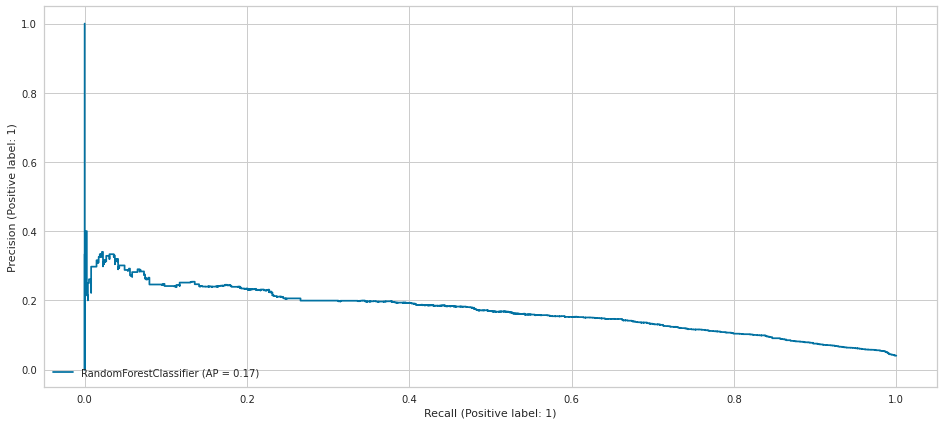

In [100]:
plot_precision_recall_curve(model, x_test, y_test)

### Obtivemos um resultado muito superior a todos os modelos que treinamos até agora, lucro de **9102RS** Se tentarmos trocar a técnica para um **gradient boosting**, obteremos um melhor resultado?

Vamos testar o mesmo pipeline para o xgboost, porem aqui iremos tunar esses hiperparametros:

- **max_depth** (profundidade maxima das arvores de decisoes)
- **learning_rate** (contribuição das novas arvores para correcao do erro da anterior)
- **n_estimators** (número de estimadores )
- **gamma** (regularizacao que colocamos no "information gain" de cada quebra, nos ajudará a definir a loss minima para fazermos uma quebra/split nas nossas arvores
- **min_child_weight** soma minima dos pesos de um nó filho, usado para que nao tenhamos pesos excessivos e que o modelo nao fique "especialista" tendendo a overfitting
- **subsample** proporção das instâncias de treinamento que iremos pegar
- **colsample_bytree** proporção das colunas de treinamento que iremos pegar
- **scale_pos_weight** controla o desbalanceamento das classes, otimo hiperparametro para tunar em problemas desbalanceados

### Qual o modelo a ser batido?

In [101]:
print(model)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=150, n_estimators=150, n_jobs=-1,
                       random_state=18051996)


### Iniciando o tuning da Xgboost

Lucro 10614.000 params {'max_depth': 6, 'learning_rate': 0.01, 'n_estimators': 90, 'gamma': 20.0, 'min_child_weight': 31.0, 'subsample': 0.46, 'colsample_bytree': 0.6900000000000001, 'scale_pos_weight': 11}
Lucro 0.000 params {'max_depth': 4, 'learning_rate': 0.007, 'n_estimators': 130, 'gamma': 15.0, 'min_child_weight': 46.0, 'subsample': 0.51, 'colsample_bytree': 0.88, 'scale_pos_weight': 3}
Lucro 10332.000 params {'max_depth': 5, 'learning_rate': 0.007, 'n_estimators': 50, 'gamma': 10.0, 'min_child_weight': 19.0, 'subsample': 0.77, 'colsample_bytree': 0.71, 'scale_pos_weight': 10}
Lucro 0.000 params {'max_depth': 6, 'learning_rate': 0.007, 'n_estimators': 190, 'gamma': 5.0, 'min_child_weight': 24.0, 'subsample': 0.46, 'colsample_bytree': 0.42, 'scale_pos_weight': 3}
Lucro 10240.000 params {'max_depth': 5, 'learning_rate': 0.002, 'n_estimators': 110, 'gamma': 5.0, 'min_child_weight': 28.0, 'subsample': 0.75, 'colsample_bytree': 0.44, 'scale_pos_weight': 11}
100%|██████████| 5/5 [01:0

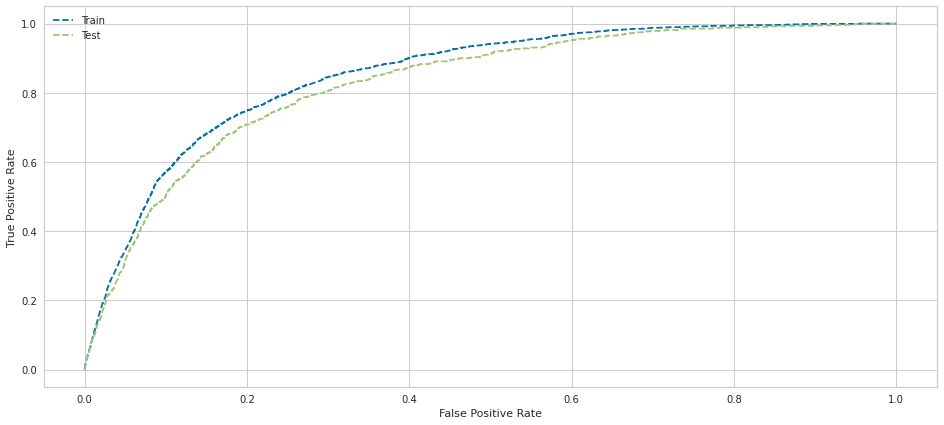

-----------------------------------------------------
ROC AUC Train =0.852
ROC AUC Test =0.829
-----------------------------------------------------
f1 train = 0.28123994422396226
f1 test = 0.25627817128139085
-----------------------------------------------------
------------------------
Calculate decil in train
------------------------
     Qtd  Sum_Target  Per_Target  Per_Acum_Target  Max_proba  Min_proba   Lift
0  11403        1634      72.429           72.429      0.671      0.410  3.621
1  11403         365      16.179           88.608      0.410      0.335  2.215
2  11403         179       7.934           96.543      0.335      0.281  1.609
3  11403          63       2.793           99.335      0.281      0.243  1.242
4  11403          15       0.665          100.000      0.243      0.220  1.000
------------------------
Calculate decil in test
------------------------
    Qtd  Sum_Target  Per_Target  Per_Acum_Target  Max_proba  Min_proba   Lift
0  3801         512      68.085    

In [103]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
xgb.set_config(verbosity=0)

def objective(params):
    
    params = {'max_depth': int(params['max_depth'])
          , 'learning_rate': float(params['learning_rate'])
          , 'n_estimators': int(params['n_estimators'])
          , 'gamma': float(params['gamma'])
          , 'min_child_weight': float(params['min_child_weight'])
          , 'subsample': float(params['subsample'])
          , 'colsample_bytree': float(params['colsample_bytree'])
          , 'scale_pos_weight': int(params['scale_pos_weight'])
         }
    
    clf = xgb.XGBClassifier(n_jobs=-1
                            ,objective= 'binary:logistic'
                            ,**params
                            ,random_state=seed)

    score = cross_val_score(clf, x_train, y_train, scoring=lucro, cv=StratifiedKFold()).mean()

    print("Lucro {:.3f} params {}".format(score, params))
    score = -1*(score)
    return score

space={ 'max_depth' : hp.choice('max_depth', range(4, 8, 1)),
         'learning_rate' : hp.quniform('learning_rate', 0.001, 0.01, 0.001),
         'n_estimators' : hp.choice('n_estimators', range(50, 200, 20)),
         'gamma' : hp.quniform('gamma', 5, 25, 5),
         'min_child_weight' : hp.quniform('min_child_weight', 10, 50, 1),
         'subsample' : hp.quniform('subsample', 0.4, 0.9, 0.01),
         'colsample_bytree' : hp.quniform('colsample_bytree', 0.4, 0.9, 0.01),
         'scale_pos_weight' : hp.choice('scale_pos_weight', range(3, 15, 1)),
    }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=5)

# Print best parameters
best_params = space_eval(space, best)
print("top parameters",best_params)

print("Start training the best model")

model_xb = xgb.XGBClassifier(n_jobs=-1,random_state=seed
                                      , objective= 'binary:logistic'
                                      , max_depth=best_params['max_depth']
                                      , learning_rate = float(best_params['learning_rate'])
                                      , n_estimators = int(best_params['n_estimators'])
                                      , gamma = float(best_params['gamma'])
                                      , min_child_weight = float(best_params['min_child_weight'])
                                      , subsample = float(best_params['subsample'])
                                      , colsample_bytree = float(best_params['colsample_bytree'])
                                      , scale_pos_weight = int(best_params['scale_pos_weight'])).fit(x_train,y_train)
print("Scoring the train data")
#Scoring the best model in train dataset
print('-----------------------------------------------------')
print('-------------LUCRO----------')
lucro(model_xb, x_test, y_test)
print("Scoring the train data")
#Scoring the best model in train dataset
predict_train_entire = model_xb.predict(x_train)
proba_train_entire = model_xb.predict_proba(x_train)[:,1]

print("Scoring the test data")
#Scoring the best model in test dataset
predict_test_entire = model_xb.predict(x_test)
proba_test_entire = model_xb.predict_proba(x_test)[:,1]

print("Getting metrics")
# calculate scores
auc_train = roc_auc_score(y_train, proba_train_entire)
auc_test = roc_auc_score(y_test, proba_test_entire )

# calculate roc curves
fpr_train, tpr_train, _ = roc_curve(y_train, proba_train_entire)
fpr_test, tpr_test, _ = roc_curve(y_test, proba_test_entire)

# plot the roc curve for the model
pyplot.plot(fpr_train, tpr_train, linestyle='--', label='Train')
pyplot.plot(fpr_test, tpr_test, linestyle='--', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print('-----------------------------------------------------')
# summarize scores
print('ROC AUC Train =%.3f' % (auc_train))
print('ROC AUC Test =%.3f' % (auc_test))

print('-----------------------------------------------------')

f1_train = f1_score(y_train, predict_train_entire)
print('f1 train =',f1_train)

f1_test = f1_score(y_test, predict_test_entire)
print('f1 test =',f1_test)

print('-----------------------------------------------------')
print("------------------------")
print("Calculate decil in train")
print("------------------------")

avg_tgt = y_train.sum()/len(y_train)
df_data = x_train.copy()
X_data = df_data.copy()
df_data['Actual'] = y_train
df_data['Predict']= model_xb.predict(X_data)
y_Prob = pd.DataFrame(model_xb.predict_proba(X_data))
df_data['Prob_1']=list(y_Prob[1])
df_data.sort_values(by=['Prob_1'],ascending=False,inplace=True)
df_data.reset_index(drop=True,inplace=True)
df_data['Decile']=pd.qcut(df_data.index,5,labels=False)
output_df = pd.DataFrame()
grouped = df_data.groupby('Decile',as_index=False)
output_df['Qtd']=grouped.count().Actual
output_df['Sum_Target']=grouped.sum().Actual
output_df['Per_Target'] = (output_df['Sum_Target']/output_df['Sum_Target'].sum())*100
output_df['Per_Acum_Target'] = output_df.Per_Target.cumsum()
output_df['Max_proba']=grouped.max().Prob_1
output_df['Min_proba']=grouped.min().Prob_1
output_df["Per_Pop"] = (output_df["Qtd"]/len(y_train))*100
output_df["Lift"] = output_df["Per_Acum_Target"]/output_df.Per_Pop.cumsum()
output_df= output_df.drop(columns='Per_Pop')
print(round(output_df,3))

print("------------------------")
print("Calculate decil in test")
print("------------------------")
Avg_tgt = y_test.sum()/len(y_test)
df_data = x_test.copy()
X_data = df_data.copy()
df_data['Actual'] = y_test
df_data['Predict']= model_xb.predict(X_data)
y_Prob = pd.DataFrame(model_xb.predict_proba(X_data))
df_data['Prob_1']=list(y_Prob[1])
df_data.sort_values(by=['Prob_1'],ascending=False,inplace=True)
df_data.reset_index(drop=True,inplace=True)
df_data['Decile']=pd.qcut(df_data.index,5,labels=False)
output_df = pd.DataFrame()
grouped = df_data.groupby('Decile',as_index=False)
output_df['Qtd']=grouped.count().Actual
output_df['Sum_Target']=grouped.sum().Actual
output_df['Per_Target'] = (output_df['Sum_Target']/output_df['Sum_Target'].sum())*100
output_df['Per_Acum_Target'] = output_df.Per_Target.cumsum()
output_df['Max_proba']=grouped.max().Prob_1
output_df['Min_proba']=grouped.min().Prob_1
output_df["Per_Pop"] = (output_df["Qtd"]/len(y_test))*100
output_df["Lift"] = output_df["Per_Acum_Target"]/output_df.Per_Pop.cumsum()
output_df= output_df.drop(columns='Per_Pop')
print(round(output_df,3))

### Batemos de 9102 e agora temos um lucro de 10614S.Agora, vamos procurar pelo melhor threshould de proba para obtermos um máximo lucro em ambos os modelos? Mas, antes disso vamos verificar as features mais importantes para o nosso modelo

best model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6900000000000001, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=20.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=31.0, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=18051996, reg_alpha=0, reg_lambda=1, ...)


<AxesSubplot:title={'center':'feature importance XGboost com tuning'}, xlabel='F score', ylabel='Features'>

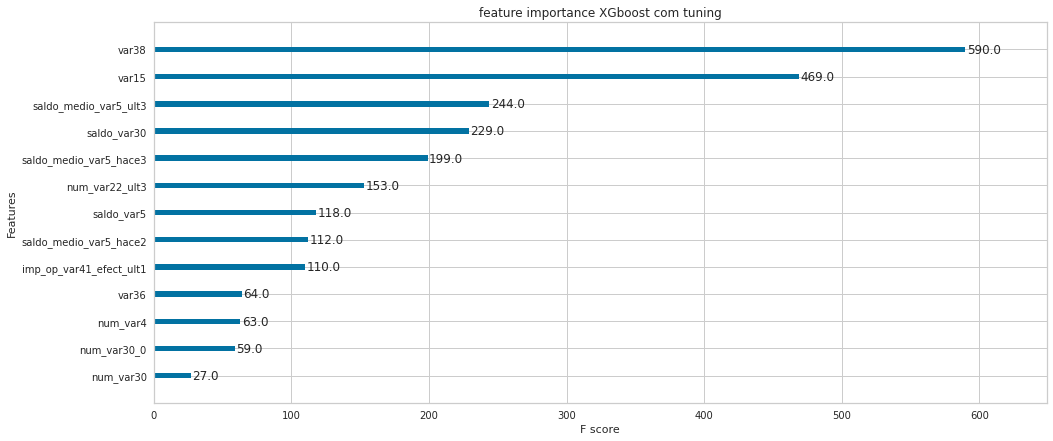

In [104]:
print("best model",model_xb)
plot_importance(model_xb,title="feature importance XGboost com tuning")

In [105]:
import itertools
def plot_confusion_matrix(y_test, y_pred, title='Confusion matrix'):
    
    cm = confusion_matrix(y_test, y_pred)
    classes = ['Não satisfeito', 'Satisfeito']
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, )
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    #capturando dados de verdadeiro positivo e falso positivo na matriz de confusao
    verdadeiro_positivo = cm[1][1]
    falso_positivo = cm[0][1]

    #Calcula o lucro com base na formula do problema
    lucro_total = 90*verdadeiro_positivo - 10*falso_positivo 
    print(round(lucro_total,2))
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def train_clf_threshold(x_train,y_train,x_test,y_test,modelo):
    thresholds = np.arange(0.1, 1, 0.1)
    
            
    model_xb.fit(x_train, y_train)
    y_proba = modelo.predict_proba(x_test)
    
    plt.figure(figsize=(10,10))

    j = 1
    for i in thresholds:
        y_pred = y_proba[:,1] > i

        plt.subplot(4, 3, j)
        j += 1

        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test,y_pred)
        np.set_printoptions(precision=2)

        print(f"Threshold: {round(i, 1)} | Test f1: {round(f1_score(y_test, y_pred), 2)} ")

        # Plot non-normalized confusion matrix
        plot_confusion_matrix(y_test, y_pred, title=f'Threshold >= {round(i, 1)}')

### Buscando melhor threshold com xgboost e random forest

### Xgboost threshold

Threshold: 0.1 | Test f1: 0.08 
-114850
Threshold: 0.2 | Test f1: 0.08 
-114850
Threshold: 0.3 | Test f1: 0.13 
-30550
Threshold: 0.4 | Test f1: 0.22 
12080
Threshold: 0.5 | Test f1: 0.26 
16260
Threshold: 0.6 | Test f1: 0.24 
11310
Threshold: 0.7 | Test f1: 0.0 
0
Threshold: 0.8 | Test f1: 0.0 
0
Threshold: 0.9 | Test f1: 0.0 
0


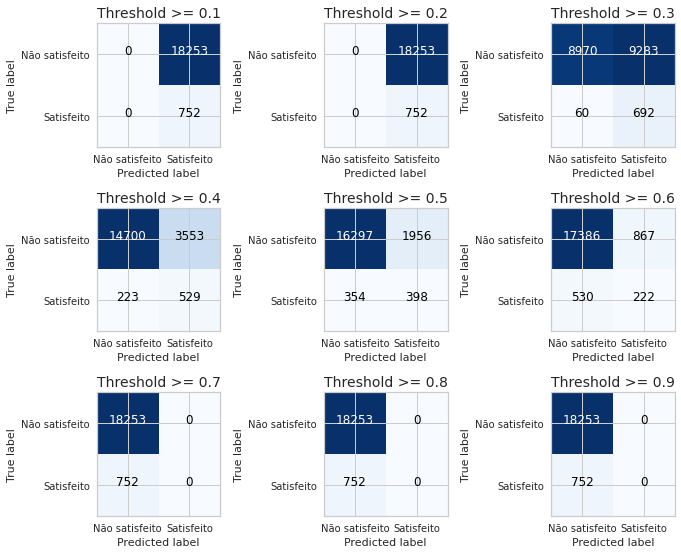

In [106]:
train_clf_threshold(x_train,y_train,x_test,y_test,modelo=model_xb)

### Random forest threshold

Threshold: 0.1 | Test f1: 0.09 
-77750
Threshold: 0.2 | Test f1: 0.11 
-46570
Threshold: 0.3 | Test f1: 0.14 
-23790
Threshold: 0.4 | Test f1: 0.18 
1190
Threshold: 0.5 | Test f1: 0.23 
14260
Threshold: 0.6 | Test f1: 0.24 
15230
Threshold: 0.7 | Test f1: 0.25 
15210
Threshold: 0.8 | Test f1: 0.26 
14380
Threshold: 0.9 | Test f1: 0.0 
0


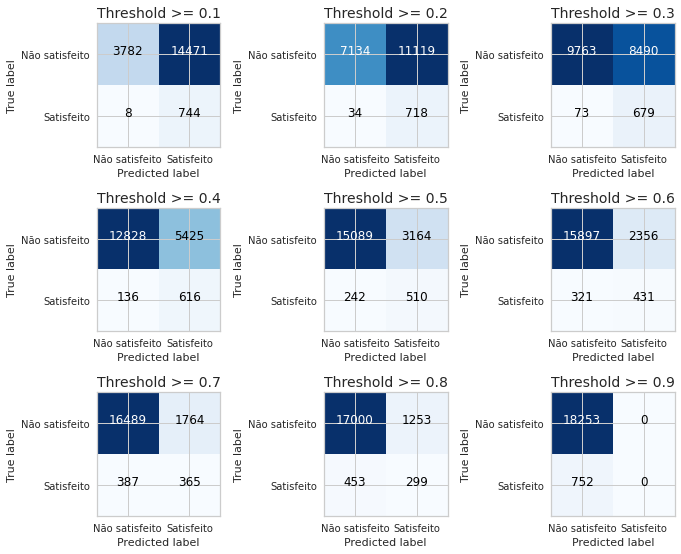

In [107]:
train_clf_threshold(x_train,y_train,x_test,y_test,modelo=model)

### Melhor modelo Xgboost com o ponto de corte =  0.5 e lucro de 16260

## **B**
A segunda tarefa consiste em dar uma nota de 1 a 5 para cada cliente da base teste, respeitando a variável ‘TARGET’, isto é, o seu nível de satisfação, sendo 1 o mais insatisfeito e 5 o mais satisfeito. Ao dar essa nota deve-se ter em mente que somente os clientes com nota 1 serão alvos de uma ação de retenção e que o objetivo dessa ação é maximizar o lucro esperado por cliente (usando os mesmos valores da primeira questão).

In [156]:
intervalos.describe()

,counts,freqs
categories,,
"(0.219, 0.245]",4163,0.250015
"(0.245, 0.291]",4163,0.250015
"(0.291, 0.349]",4162,0.249955
"(0.349, 0.5]",4163,0.250015


melhor modelo XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6900000000000001, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=20.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=31.0, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=18051996, reg_alpha=0, reg_lambda=1, ...)
Lucro obtido com a ação =  16260
Qtd de pessoas atingidas =  2354


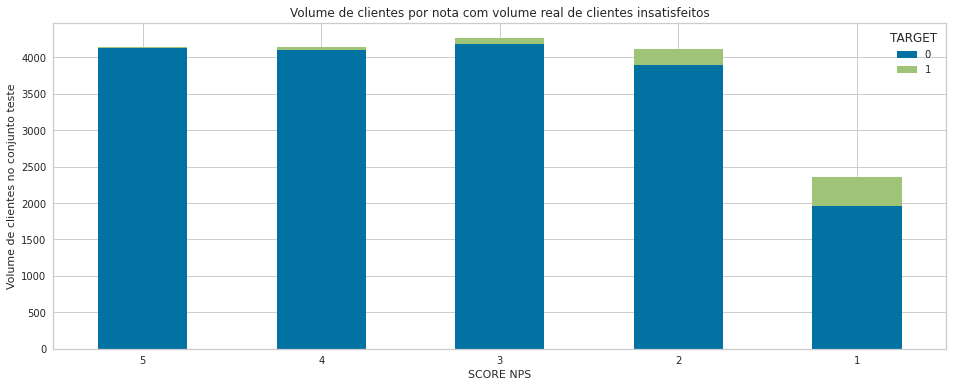

In [166]:
print("melhor modelo",model_xb)
proba_test = model_xb.predict_proba(x_test)[:,1]
threshold = 0.5

#score_nps = pd.cut(proba_test, bins=list(np.linspace(0,threshold,5))+[1.0], labels=[5,4,3,2,1])
score_nps = pd.cut(proba_test,bins=list([0.0, 0.245, 0.291, 0.349, 0.5, 1.0]), labels=[5,4,3,2,1])

table_fim = pd.concat((pd.Series(score_nps, name='score_nps')
           , y_test.reset_index(drop=True))
          , axis=1, ignore_index=False)

table_fim.groupby(['TARGET','score_nps']).size().unstack('TARGET')\
.plot.bar(stacked=True,figsize = (16,6))
plt.xticks(rotation=0)
plt.ylabel('Volume de clientes no conjunto teste')
plt.xlabel('SCORE NPS')
plt.title('Volume de clientes por nota com volume real de clientes insatisfeitos')


#Preparando colunas para mtriz de confusao
y_pred_fim = table_fim[table_fim.score_nps==1]['score_nps']
y_true_fim = table_fim[table_fim.score_nps==1]['TARGET']
y_true_total = table_fim['TARGET']

matriz_confusao = confusion_matrix(y_true_fim, y_pred_fim)
      
#capturando dados de verdadeiro positivo e falso positivo na matriz de confusao
verdadeiro_positivo = matriz_confusao[1][1]
falso_positivo = matriz_confusao[0][1]

#Calcula o lucro com base na formula do problema
compilado = table_fim.groupby(['TARGET','score_nps']).size().unstack('TARGET').sort_values('score_nps',ascending= False)
print("Lucro obtido com a ação = ",compilado[1][0]*90 - compilado[0][0]*10)
print("Qtd de pessoas atingidas = ",compilado[1][0] + compilado[0][0])

### Tabela de validação e count por nota

In [202]:
proba_test = model_xb.predict_proba(df_validation)[:,1]
threshold = 0.5
score_nps = pd.cut(proba_test,bins=list([0.0, 0.245, 0.291, 0.349, 0.5, 1.0]), labels=[5,4,3,2,1])
validation = pd.DataFrame(score_nps)
validation.value_counts()

3    16919
4    16894
2    16535
5    16300
1     9170
dtype: int64

## *C*
Todo conjunto de dados é passível de ser dividido em grupos coesos, conhecidos como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que possuem os maiores lucros esperados por cliente (usando os mesmos valores da primeira questão).

## Aqui vamos testar 2 abordagens:

- **kmeans**
- **kmeans com pca**

Para fazermos esse processo vamos **tratar os outliers e fazer escalonamento dos dados** para não influenciar no kmeans

O **objetivo** dessa frente é segmentar o conjunto de dados, encontrando **padrões escondidos** na nossa base, a ideia é que pontos dentro do mesmo grupo sejam **parecidos entre si (coesão interna)** e que pontos de **grupos distintos sejam diferentes (separabilidade)**

Para conseguirmos esse tipo de agrupamento podemos utilizar 3 tipos de agrupamento que são:

**Particionais**
**hierarquicos**
**Baseado em densidade**

Aqui escolhemos um método particional que é o algoritmo de kmeans que funcionará da seguinte forma:

- 1) Escolha K centroides
- 2) Atribua cada ponto ao K centroide mais próximo
- 3) Recalcula o centro do centroide com base na média dos pontos do cluster
- 4) Repete-se o passo 2 e 3 até que se atinja um número pré definido de iterações ou um limiar mínimo de mudanças no centroide que mudem a função de custo

Um dos problemas desse tipo de agrupamento particional é que temos que definir (antes de rodar) o número ideial de clusters e como não sabemos o número ideal de clusters que melhor ira separar os dados iremos fazer algumas iterações para verificar o número de K ótimo

Para definirmos o melhor número de clusters para o nosso agrupamento vamos utilizar 2 métricas que são:

**1) Método Elbow**

Elbow é um método visual para estimarmos o número ótimo de clusters, basicamente rodamos o Kmeans multiplas vezes para K diferentes e plotamos o inertia (soma das distancias ao quadrado de cada ponto ao seu respectivo cluster). O único problema desse método é que estamos olhando apenas o conceito de coesa interna, ou seja, estamos escolhendo um K que de certa forma minimiza a distancia intra cluster, proem não estamos olhando o quesito de separabilidade (máximizar a distancia entre clusters)

**2) Silhouette Score**

Nesse método iremos usar os dois conceitos mencionados acima coesao e separabilidade, por fim queremos um cluster que minimize as distancias intra clusters (coesao) e maximize a distancia entre clusters (separbilidade). O silhouete score trabalha com esses dois conceitos, utilizando a propria inertia calculada pela funcao de custo do kmeans e a distancia entre o ponto e os pontos do clusters mais proximo ao seu. a formula fica:

a = distancia intra cluster / inertia b = distancia entre cluster (vizinho mais próximo)

silhouette = (b - a) / Max(a,b)

Um ponto de atenção é que para clusters diferentes de esféricos e com caracteristicas de densidade a silhouette perde o sentido, pois tem forte relação a métrica de distancia usada para calcular o A e B e no geral usa-se a distância euclidiana que gera clusters globulares

### Tratamento de outliers

In [205]:
#dropando possiveis colunas categoricas (0 e 1)
x_train_clusterizacao = x_train.copy()
x_test_clusterizacao = x_test.filter(x_train_clusterizacao.columns)
x_test_clusterizacao.head()

,var15,imp_op_var41_efect_ult1,num_var4,num_var30_0,num_var30,saldo_var5,saldo_var30,var36,num_var22_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult3,var38
54739,39,0.0,1,3,3,15.0,15.0,2,3,408.33,270.00,231.12,117310.979016
71206,55,0.0,1,3,3,15.0,15.0,2,3,12.90,0.00,13.95,117310.979016
41913,26,0.0,1,3,3,453.0,453.0,1,0,153.00,5.52,135.99,65588.490000
44357,23,0.0,0,3,0,0.0,0.0,99,0,0.00,0.00,0.00,89592.750000
36492,27,0.0,1,3,3,3.0,3.0,3,0,3.00,0.18,2.07,117310.979016


In [208]:
def clip_outliers(df,drop_columns,q_min,q_max):
    
    num_vars_name = df.select_dtypes(include=['float64']).columns     
    for i in num_vars_name:
        
        #get max and min quantile
        min_value = df.loc[:,i].quantile(q_min)
        max_value = df.loc[:,i].quantile(q_max)

        #replace values with max and min quantile value
        df.loc[:,i] = np.where(df.loc[:,i] < min_value, min_value,df.loc[:,i])
        df.loc[:,i] = np.where(df.loc[:,i] > max_value, min_value,df.loc[:,i])
        
    return df

#Reduce outliers for clustering analyses
x_train_clusterizacao = clip_outliers(x_train_clusterizacao,drop_columns=id_columns,q_min=0.05,q_max=0.95)
x_test_clusterizacao = clip_outliers(x_test_clusterizacao,drop_columns=id_columns,q_min=0.05,q_max=0.95)

### Scaler

In [209]:
#Scaler feature for clustering analyses
scaler = StandardScaler()
scaler.fit(x_train_clusterizacao)

#Apply in train and test
x_train_scaled = scaler.transform(x_train_clusterizacao)
x_train_scaled = pd.DataFrame(x_train_scaled, index = x_train_clusterizacao.index, columns=x_train_clusterizacao.columns)

x_test_scaled = scaler.transform(x_test_clusterizacao)
x_test_scaled = pd.DataFrame(x_test_scaled, index = x_test_clusterizacao.index, columns=x_test_clusterizacao.columns)

### Kmeans

Silhouette Score for k = 4: 0.2531
Silhouette Score for k = 5: 0.2741
Silhouette Score for k = 6: 0.2904
Silhouette Score for k = 7: 0.2653
Silhouette Score for k = 8: 0.2744
Silhouette Score for k = 9: 0.2819
Silhouette Score for k = 10: 0.2832
Silhouette Score for k = 11: 0.2859
Silhouette Score for k = 12: 0.2766
Silhouette Score for k = 13: 0.2845
Silhouette Score for k = 14: 0.2788
Silhouette Score for k = 15: 0.2815
Silhouette Score for k = 16: 0.2925
Silhouette Score for k = 17: 0.2950
Silhouette Score for k = 18: 0.2964
Silhouette Score for k = 19: 0.2967


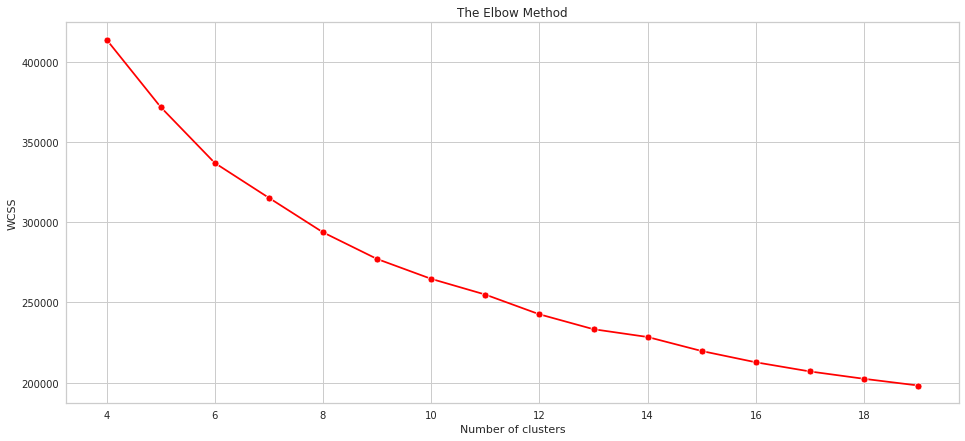

In [210]:
min = 4
max = 20
wcss = []
silhouette= []

train_kmeans = x_train_scaled.select_dtypes(include="float64")

for i in range(min, max):
    
    ##Training a kmeans model
    model = KMeans(n_clusters = i, random_state = seed)
    model.fit(train_kmeans)
    
    #Scoring
    pred = model.predict(train_kmeans)
    
    #Get silhouette score
    score = silhouette_score(train_kmeans, pred)
   
    # inertia method returns wcss for that model
    wcss.append(model.inertia_)
    print('Silhouette Score for k = {}: {:<.4f}'.format(i, score))
    
sns.lineplot(range(min, max), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [212]:
#training
best_k = 19
for i in x_train_scaled,x_test_scaled:
    kmeans = i.select_dtypes(include="float64")
    model = KMeans(n_clusters = best_k, random_state = seed)
    model.fit(x_train_scaled)

    #Scoring
    cluster = model.predict(kmeans)

    df_cluster = pd.DataFrame({'cluster': cluster}).join(y_test)
    df_cluster.columns = ['labels','true_target']

    # # Create crosstab: ct
    data = pd.crosstab(df_cluster['labels'],df_cluster['true_target'])

    data ['volumetria'] = data [0]+data [1]
    data ['ganhos'] = data [1]*90 
    data ['perdas'] = data[0]*10
    data ['total'] = data [1]*90 - data[0]*10
    print('---------------------------------')
    print('top 3 clusters para o kmeans')
    print(data.sort_values(by='total', ascending=False).head(3))
    print('---------------------------------')

---------------------------------
top 3 clusters para o kmeans
true_target  0.0  1.0  volumetria  ganhos  perdas  total
labels                                                  
7            221   12         233    1080    2210  -1130
12           197    9         206     810    1970  -1160
17           169    5         174     450    1690  -1240
---------------------------------
---------------------------------
top 3 clusters para o kmeans
true_target  0.0  1.0  volumetria  ganhos  perdas  total
labels                                                  
12            52    4          56     360     520   -160
17            56    3          59     270     560   -290
8             88    6          94     540     880   -340
---------------------------------


### Kmeans com pca

Número de componentes com o corte de 50% de cumulative variance é de: 2
Número de componentes com o corte de 60% de cumulative variance é de: 3
Número de componentes com o corte de 70% de cumulative variance é de: 4
Número de componentes com o corte de 80% de cumulative variance é de: 6
Número de componentes com o corte de 90% de cumulative variance é de: 8
Número de componentes com o corte de 100% de cumulative variance é de: 13


Text(0, 0.5, 'cumulative explained variance')

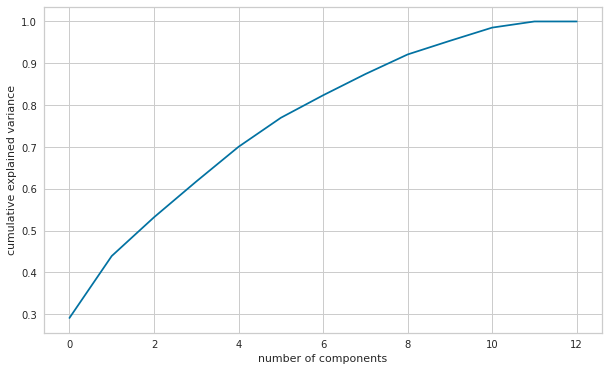

In [213]:
from sklearn.decomposition import PCA
plt.rcParams['figure.figsize'] = (10, 6)
pca = PCA(svd_solver='full').fit(x_train_scaled)
dataset = pd.DataFrame({'cum_sum_var': np.cumsum(pca.explained_variance_ratio_)[0:]})
for i in range(50,110,10):
    df = dataset[dataset['cum_sum_var'] <= (i/100)]
    print("Número de componentes com o corte de " + str(i) + "% de cumulative variance é de: " + str(df.shape[0]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Escolha do número de componentes

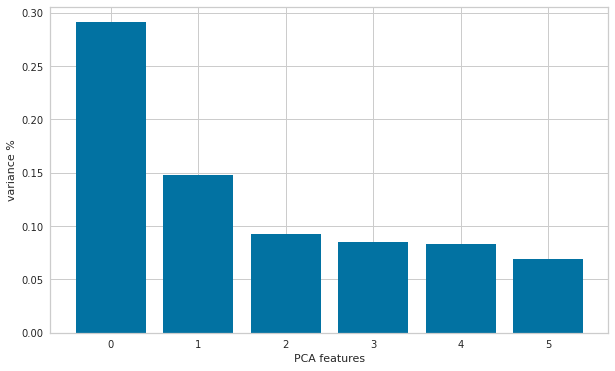

In [214]:
# Create a PCA instance: pca
pca = PCA(n_components=6)

principalComponents = pca.fit_transform(x_train_scaled)
principalComponents_test =  pca.transform(x_test_scaled)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

### Treinamento do modelo

Silhouette Score for k = 4: 0.3176
--------------------------
Silhouette Score for k = 5: 0.3443
--------------------------
Silhouette Score for k = 6: 0.3665
--------------------------
Silhouette Score for k = 7: 0.3243
--------------------------
Silhouette Score for k = 8: 0.3157
--------------------------
Silhouette Score for k = 9: 0.3165
--------------------------
Silhouette Score for k = 10: 0.3167
--------------------------
Silhouette Score for k = 11: 0.3197
--------------------------
Silhouette Score for k = 12: 0.3204
--------------------------
Silhouette Score for k = 13: 0.3206
--------------------------
Silhouette Score for k = 14: 0.3108
--------------------------
Silhouette Score for k = 15: 0.3173
--------------------------
Silhouette Score for k = 16: 0.3179
--------------------------
Silhouette Score for k = 17: 0.3085
--------------------------
Silhouette Score for k = 18: 0.2948
--------------------------
Silhouette Score for k = 19: 0.3018
-------------------------

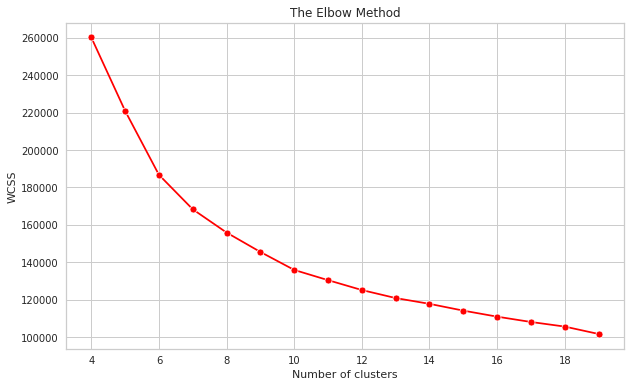

In [215]:
min = 4
max = 20
wcss = []
silhouette= []


for i in range(min, max):
    
    ##Training a kmeans model
    model_kmeans_pca = KMeans(n_clusters = i, random_state = seed)
    model_kmeans_pca.fit(PCA_components)
    
    #Scoring
    pred = model_kmeans_pca.predict(PCA_components)
    
    #Get silhouette score
    score = silhouette_score(PCA_components, pred)
   
    # inertia method returns wcss for that model
    wcss.append(model_kmeans_pca.inertia_)
    print('Silhouette Score for k = {}: {:<.4f}'.format(i, score))
    print('--------------------------')
sns.lineplot(range(min, max), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [216]:
#training
best_k = 6

for i in principalComponents,principalComponents_test:
    kmeans = i
    model = KMeans(n_clusters = best_k, random_state = seed)
    model.fit(principalComponents)

    #Scoring
    cluster = model.predict(i)

    df_cluster = pd.DataFrame({'cluster': cluster}).join(y_test)
    df_cluster.columns = ['labels','true_target']

    # # Create crosstab: ct
    data = pd.crosstab(df_cluster['labels'],df_cluster['true_target'])

    data ['volumetria'] = data [0]+data [1]
    data ['ganhos'] = data [1]*90 
    data ['perdas'] = data[0]*10
    data ['total'] = data [1]*90 - data[0]*10
    print('---------------------------------')
    print('top 3 clusters para o kmeans')
    print(data.sort_values(by='total', ascending=False).head(3))
    print('---------------------------------')

---------------------------------
top 3 clusters para o kmeans
true_target   0.0  1.0  volumetria  ganhos  perdas  total
labels                                                   
5             651   25         676    2250    6510  -4260
2            1025   45        1070    4050   10250  -6200
3            1076   45        1121    4050   10760  -6710
---------------------------------
---------------------------------
top 3 clusters para o kmeans
true_target  0.0  1.0  volumetria  ganhos  perdas  total
labels                                                  
5            201    8         209     720    2010  -1290
3            339   15         354    1350    3390  -2040
2            326    9         335     810    3260  -2450
---------------------------------


### Melhor cluster foi o kmeans com PCA, porem nao obtivemos nenhum cluster com lucro

### Outra possivel abordagem a ser testada

Ao inves de procurarmos os clusters com as metricas usuais de validação, poderiamos a cada iteração do número K de cluster plotarmos o lucro do top3 grupos com lucro, porem não necessariamente encontrariamos clusters otimos e poderiamos cair em uma seleção aleatoria de grupos que dariam lucro. Abaixo o código que conduziria essa abordagem

In [ ]:
min = 4
max = 20
wcss = []
silhouette= []

train_kmeans = x_train_scaled.select_dtypes(include="float64")

for i in range(min, max):
    
    ##Training a kmeans model
    model = KMeans(n_clusters = i, random_state = seed)
    model.fit(train_kmeans)
    
    #Scoring
    pred = model.predict(train_kmeans)
    
    #Funcao para capturar o ganho maximo em cada iteração
    df_cluster = pd.DataFrame({'cluster': pred}).join(y_test)
    df_cluster.columns = ['labels','true_target']
    data = pd.crosstab(df_cluster['labels'],df_cluster['true_target'])
    data['volumetria'] = data[0]+data[1]
    data['ganhos'] = data[1]*90 
    data['perdas'] = data[0]*10
    data['total'] = data[1]*90 - data[0]*10
    data.sort_values(by='ganhos', ascending='total')
    print('--------------------------')
    print('Melhores 3 clusters e lucros for k = {}:'.format(i))
    print(data.sort_values(by='total', ascending=False).head(3)['total'])
    del data
    
    #Get silhouette score
    score = silhouette_score(train_kmeans, pred)
   
    # inertia method returns wcss for that model
    wcss.append(model.inertia_)
    print('Silhouette Score for k = {}: {:<.4f}'.format(i, score))
    
sns.lineplot(range(min, max), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Próximos passos em ambos os cases

#A

#B

#C
